# Optimization Methods for Data Science

##### Authors: Mojtaba Amini , Kamile Dementaviciute, Saeed Soufeh

##### Implemetation of SFW, MSFW and SVRF for a Neural Network
##### Deadline: 25/06/2022

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
import seaborn as sns


###Load Dataset


The shape of X is: (1000, 2)
The shape of Y is: (1000,)
I have m = 1000 training examples!


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

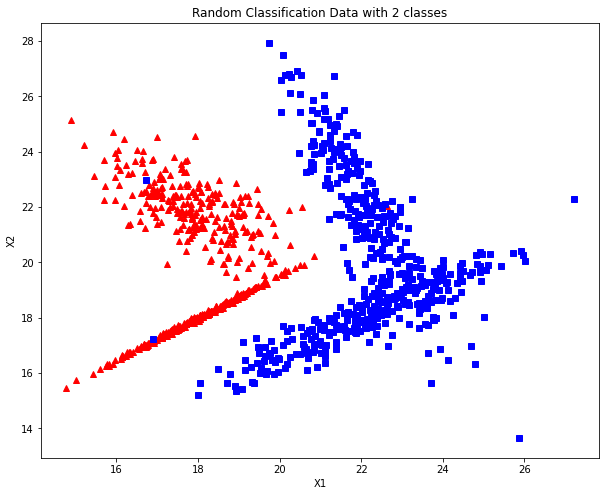

In [ ]:
X, Y = datasets.make_classification(n_samples=1000, n_features=2, random_state=123, n_redundant= 0, scale=20, shift=10)
X = X*0.1 # just to reduce the order of values

shape_X = X.shape
shape_Y = Y.shape
m = (X.size)/shape_X[1] 

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
plt.plot(X[:, 0][ Y== 1], X[:, 1][Y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s
    
def relu(x):
    return max(0.0, x)

###Building Neural Network with one layer

Lets define the neural network. 

####Defining the neural network structure

    
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    

In [ ]:
def layer_sizes(X, Y):

  n_x = X.shape[1] # size of input layer
  n_h = 3 # we have 3 hidden units
  n_y = 1 # size of output layer
    
  return (n_x, n_h, n_y)

In [ ]:
n_x,n_h,n_y=layer_sizes(X, Y)



    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
   

In [ ]:
def initialize_parameters(n_x, n_h, n_y):

  np.random.seed(2) 
  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters

In [ ]:
n_x, n_h, n_y = layer_sizes(X, Y)
print(n_x)
param = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(param["W1"]))
print()
print("b1 = " + str(param["b1"]))
print()
print("W2 = " + str(param["W2"]))
print()
print("b2 = " + str(param["b2"]))


2
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]]

b1 = [[0.]
 [0.]
 [0.]]

W2 = [[ 0.00502881 -0.01245288 -0.01057952]]

b2 = [[0.]]



    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"


In [ ]:
def forward_propagation(X, parameters):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  Z1 = np.dot(W1,X.T) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)
  # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
  return A2, cache

In [ ]:
n_x, n_h, n_y = layer_sizes(X, Y)
param = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward_propagation(X, param)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.24037126403291875 -0.2251268235415324 0.00585932870425837 0.5014648276148838


The cost funcion is : $$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$


 
    Computes the cross-entropy cost 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy

In [ ]:
def compute_cost(A2, Y):

  m = Y.shape[0] # number of example
  # Compute the cross-entropy cost
  logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)  
  cost = float(np.squeeze(cost))  
  
  return cost

In [ ]:
n_x, n_h, n_y = layer_sizes(X, Y)
param = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward_propagation(X, param)
cost = compute_cost(A2, Y)

print("cost = " + str(cost))

cost = 0.6927506263960703



    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters


In [ ]:
def backward_propagation(parameters, cache, X, Y):

  m = X.shape[0]
  # First, retrieve W1 and W2 from the dictionary "parameters".
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  # Retrieve also A1 and A2 from dictionary "cache".
  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]
  # Backward propagation: calculate dW1, db1, dW2, db2. 
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
  dW1 = (1/m) *(np.dot(dZ1,X))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}

  return grads

In [ ]:
n_x, n_h, n_y = layer_sizes(X, Y)
param = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward_propagation(X, param)
grads = backward_propagation(param, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-0.00491658  0.00028529]
 [ 0.01113681 -0.00158199]
 [ 0.00522309 -0.00324774]]
db1 = [[ 1.13549414e-05]
 [-7.53369063e-05]
 [-1.55920916e-04]]
dW2 = [[0.00411884 0.02179192 0.0133728 ]]
db2 = [[0.00146483]]


In [ ]:
def Simple_FW_find_direction(grads):

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]
  #dW1_max=np.max(np.absolute(dW1))
  #dW2_max=np.max(np.absolute(dW2))
  #db1_max=np.max(np.absolute(db1))
  #db2_max=np.max(np.absolute(db2))
  #max=[dW1_max,dW2_max,db1_max,db2_max]
  #index=np.argmax(max)
  dW1_hat=np.zeros(dW1.shape)
  dW2_hat=np.zeros(dW2.shape)
  db1_hat=np.zeros(db1.shape)
  db2_hat=np.zeros(db2.shape)
  
  #if index==0:
  arg = np.unravel_index(dW1.argmax(), dW1.shape)
  dW1_hat[arg[0]][arg[1]]=np.sign(-dW1[arg[0]][arg[1]])

  #elif index==1:
  arg = np.unravel_index(dW2.argmax(), dW2.shape)
  dW2_hat[arg[0]][arg[1]]=np.sign(-dW2[arg[0]][arg[1]])

  #elif index==2: 
  arg = np.unravel_index(db1.argmax(), db1.shape)
  db1_hat[arg[0]][arg[1]]=np.sign(-db1[arg[0]][arg[1]])

  #elif index==3:
  arg = np.unravel_index(db2.argmax(), db2.shape)
  db2_hat[arg[0]][arg[1]]=np.sign(-db2[arg[0]][arg[1]])

  Mgrads = {"dW1_hat": dW1_hat,"dW2_hat": dW2_hat,"db1_hat": db1_hat,"db2_hat": db2_hat}

  return Mgrads


    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 


In [ ]:
def update_parameters(parameters, Mgrads, learning_rate):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]    
  # Retrieve each gradient from the dictionary "grads"
  dW1_hat = Mgrads["dW1_hat"]
  db1_hat = Mgrads["db1_hat"]
  dW2_hat = Mgrads["dW2_hat"]
  db2_hat = Mgrads["db2_hat"]
  # Update rule for each parameter
  W1 = W1 + learning_rate * (dW1_hat - W1)
  b1 = b1 + learning_rate * (db1_hat - b1)
  W2 = W2 + learning_rate * (dW2_hat - W2)
  b2 = b2 + learning_rate * (db2_hat - b2)
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters

In [ ]:
n_x, n_h, n_y = layer_sizes(X, Y)
param = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward_propagation(X, param)
grads = backward_propagation(param, cache, X, Y)
Mgrads = Simple_FW_find_direction(grads)
parameters = update_parameters(param, Mgrads,1.2)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 8.33515695e-04  1.12533654e-04]
 [-1.19572761e+00 -3.28054162e-03]
 [ 3.58687117e-03  1.68349473e-03]]
b1 = [[-1.2]
 [ 0. ]
 [ 0. ]]
W2 = [[-1.00576283e-03 -1.19750942e+00  2.11590444e-03]]
b2 = [[-1.2]]


###Neural Network Model

In [ ]:
# NN_model
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  
  n_x,n_h,n_y=layer_sizes(X, Y)
  # Initialize parameters
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 
  # Loop (gradient descent)
  plot_cost=[]
  for i in range(0, num_iterations):
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
    A2, cache = forward_propagation(X, parameters)
    # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
    cost = compute_cost(A2, Y)
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
    grads = backward_propagation(parameters, cache, X, Y)
    Mgrads = Simple_FW_find_direction(grads)
    # Update rule for each parameter
    learning_rate = 2/(i+1)
    parameters = update_parameters(parameters, Mgrads, learning_rate)
    # If print_cost=True, Print the cost every 1000 iterations
    
    if print_cost and i % 1000 == 0:
      plot_cost.append(cost)
      print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output


  return parameters, plot_cost

Cost after iteration 0: 0.692751
Cost after iteration 1000: 0.670537
Cost after iteration 2000: 0.670495
Cost after iteration 3000: 0.670479
Cost after iteration 4000: 0.670478
Cost after iteration 5000: 0.670477
Cost after iteration 6000: 0.670477
Cost after iteration 7000: 0.670476
Cost after iteration 8000: 0.670476
Cost after iteration 9000: 0.670476
Cost after iteration 10000: 0.670476
Cost after iteration 11000: 0.670476
Cost after iteration 12000: 0.670476
Cost after iteration 13000: 0.670476
Cost after iteration 14000: 0.670476
Cost after iteration 15000: 0.670476
Cost after iteration 16000: 0.670476
Cost after iteration 17000: 0.670476
Cost after iteration 18000: 0.670476
Cost after iteration 19000: 0.670476
Cost after iteration 20000: 0.670476
Cost after iteration 21000: 0.670476
Cost after iteration 22000: 0.670476
Cost after iteration 23000: 0.670476
Cost after iteration 24000: 0.670476
Cost after iteration 25000: 0.670476
Cost after iteration 26000: 0.670476
Cost after ite

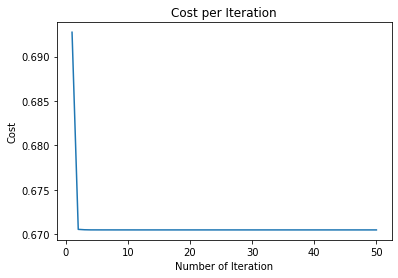

In [ ]:
parameters,plot_cost = nn_model(X, Y, 3 ,num_iterations=50000, print_cost=True)
print(plot_cost)
x=np.linspace(1,len(plot_cost),len(plot_cost))
plot = sns.lineplot(x=x,y=plot_cost)
plot.set(title='Cost per Iteration')
plot.set_xlabel("Number of Iteration")
plot.set_ylabel("Cost")
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))